In [23]:
import numpy as np 
from qclab.algorithms.mean_field import MeanFieldDynamics
from qclab.models.holstein_lattice import HolsteinLatticeModel
from qclab.simulation import Simulation
from qclab.drivers.serial_driver import run_simulation


# simulation parameters 
simulation_parameters = dict(dt = 0.001, tmax = 10, num_trajs = 50, batch_size = 50)
sim = Simulation(simulation_parameters)
model_parameters = dict(N = 5, j = 1.0,w = 1.0, g = 0.1)
sim.model = HolsteinLatticeModel(model_parameters)
sim.algorithm = MeanFieldDynamics()


wf_db_0 = np.zeros(sim.model.parameters.N) + 0.0j
wf_db_0[0] = 1.0+0.0j
sim.state.add('wf_db', wf_db_0)

data = run_simulation(sim)


100%|██████████| 10001/10001 [00:03<00:00, 2633.70it/s]


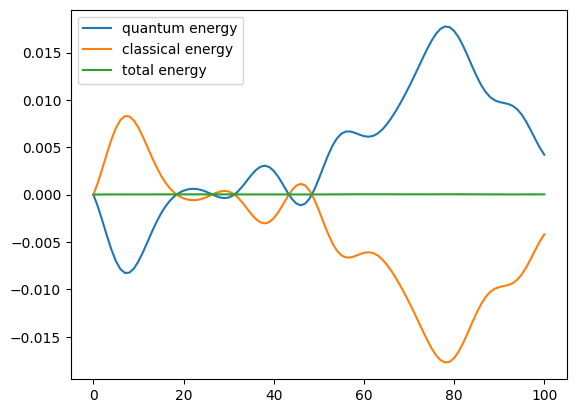

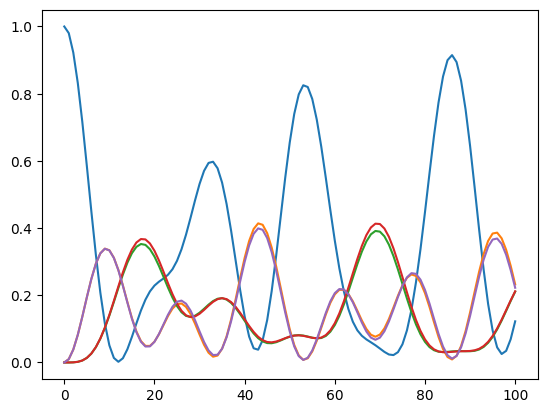

In [24]:
ntraj = len(data.data_dic['seed'])
eq = data.data_dic['quantum_energy']/ntraj
ec = data.data_dic['classical_energy']/ntraj
pops = np.einsum('tii->ti', data.data_dic['dm_db']/ntraj)

import matplotlib.pyplot as plt
plt.plot(eq-eq[0], label='quantum energy')
plt.plot(ec-ec[0], label='classical energy') 
plt.plot(eq-eq[0] + ec-ec[0], label='total energy') 
plt.legend()
plt.show()
plt.plot(pops)
plt.show()